In [1]:
%matplotlib widget

In [2]:
import numpy as np
from matplotlib.transforms import Bbox
import matplotlib.pyplot as plt
import glob
import pickle

import importlib as imp
import AstroWidgets as aw
import Spectra as sp
import seaborn as sns
import os

In [3]:
datadir = "/Users/alexdelfranco/Library/CloudStorage/GoogleDrive-adelfranco24@amherst.edu/My Drive/Research/Harvard CfA/Data"
os.chdir(datadir)
dates = glob.glob('*')
print(dates)

['20220802b', '20220610', '20220519', '20220714', '20220708b', '20220803', '20220802a', '20220718', '20220729', '20220711', '20220801', 'Unsorted Data', '20220708a']


In [4]:
date = '20220519'
# date = '20220714'
data_dict = sp.load(datadir,date) # Read In Data

## PLAN FOR MONDAY

- text rafa in the morning - tell him that i talked it over with matt and that we can zoom during the day
- generate tpd pickles for all the data I have

table of all experiments
- chemistry
    - 4K, 6K, 8K, and 10K, all with 3 component mixture
    - which days were these?
- h2 entrapment
    - decreasing h2 signal as we warmed in first experiment grown at 4K
    - check which different ratios we used

3 kinds of graphs
- tpd curves
    - baseline
- spectra
    - baseline
    - gaussian fit
- difference spectra
    - arrows to features
    
editing the paper
- incorporate rafa's feedback
- add figure matt mentioned
- ask matt about the ice spectra he mentioned


In [5]:
tpddat = data_dict['TPD']['TPD_qms']

temp = tpddat['Temp']
icetemp = data_dict['Info']['Icetemp']
print('Icetemp: '+str(icetemp))

Icetemp: 4


- 44-CO2 - 40-C20
- 16-CH4 - 18-NH3
- 54-C2N2 - 29-H2CO
- 14-H2C - 44-HNCO

In [6]:
mass = 16

tpdcurve = tpddat[f'{mass}'] * 1e12

Output()

Output()

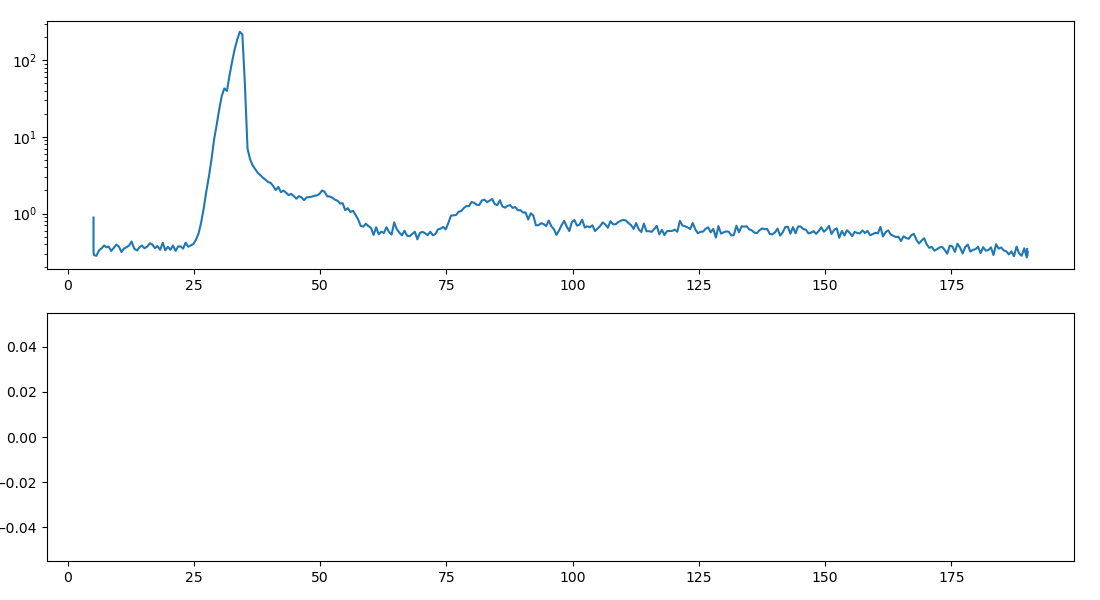

In [7]:
# Setup the figure
plt.close()
imp.reload(aw)
fig,axes = plt.subplots(2,1,figsize=(11,6))
fig.tight_layout()

axes[0].plot(temp,tpdcurve)

# Setep the plotter
fit = aw.baseline(fig,axes,baseline=(temp,tpdcurve),output_path=f'Pickles/TPD/{icetemp}K_m{mass}_')#,load_file=f'Pickles/TPD/{icetemp}K_m{mass}_CH4.pkl')

In [117]:
fnames = ['4K_m44_CO2',   '6K_m44_CO2',    '8K_m44_CO2',    '10K_m44_CO2',
          '4K_m40_C2O',   '6K_m40_C2O',    '8K_m40_C2O',    '10K_m40_C2O',
          '4K_m16_CH4',   '6K_m16_CH4',    '8K_m16_CH4',    '10K_m16_CH4',
          # '4K_m18_NH3',   '6K_m18_NH3',    '8K_m18_NH3',    '10K_m18_NH3',
          '4K_m54_C2N2',  '6K_m54_C2N2',   '8K_m54_C2N2',   '10K_m54_C2N2',
          '4K_m29_H2CO',  '6K_m29_H2CO',   '8K_m29_H2CO',   '10K_m29_H2CO',
          '4K_m14_H2C',   '6K_m14_H2C',    '8K_m14_H2C',    '10K_m14_H2C']
          # '4K_m44_HNCO',  '6K_m44_HNCO',   '8K_m44_HNCO',   '10K_m44_HNCO'

labels = ['CO$_2$','C$_2$O','CH$_4$','NH$_3$','C$_2^{15}$N$_2$','H$_2$CO','H$_2$C','HNCO']
labels = ['CO$_2$\nm/z = 44','C$_2$O\nm/z = 40','CH$_4$\nm/z = 16','C$_2$$^{15}$N$_2$\nm/z = 54','H$_2$CO\nm/z = 29','H$_2$C$_2$O\nm/z = 14']

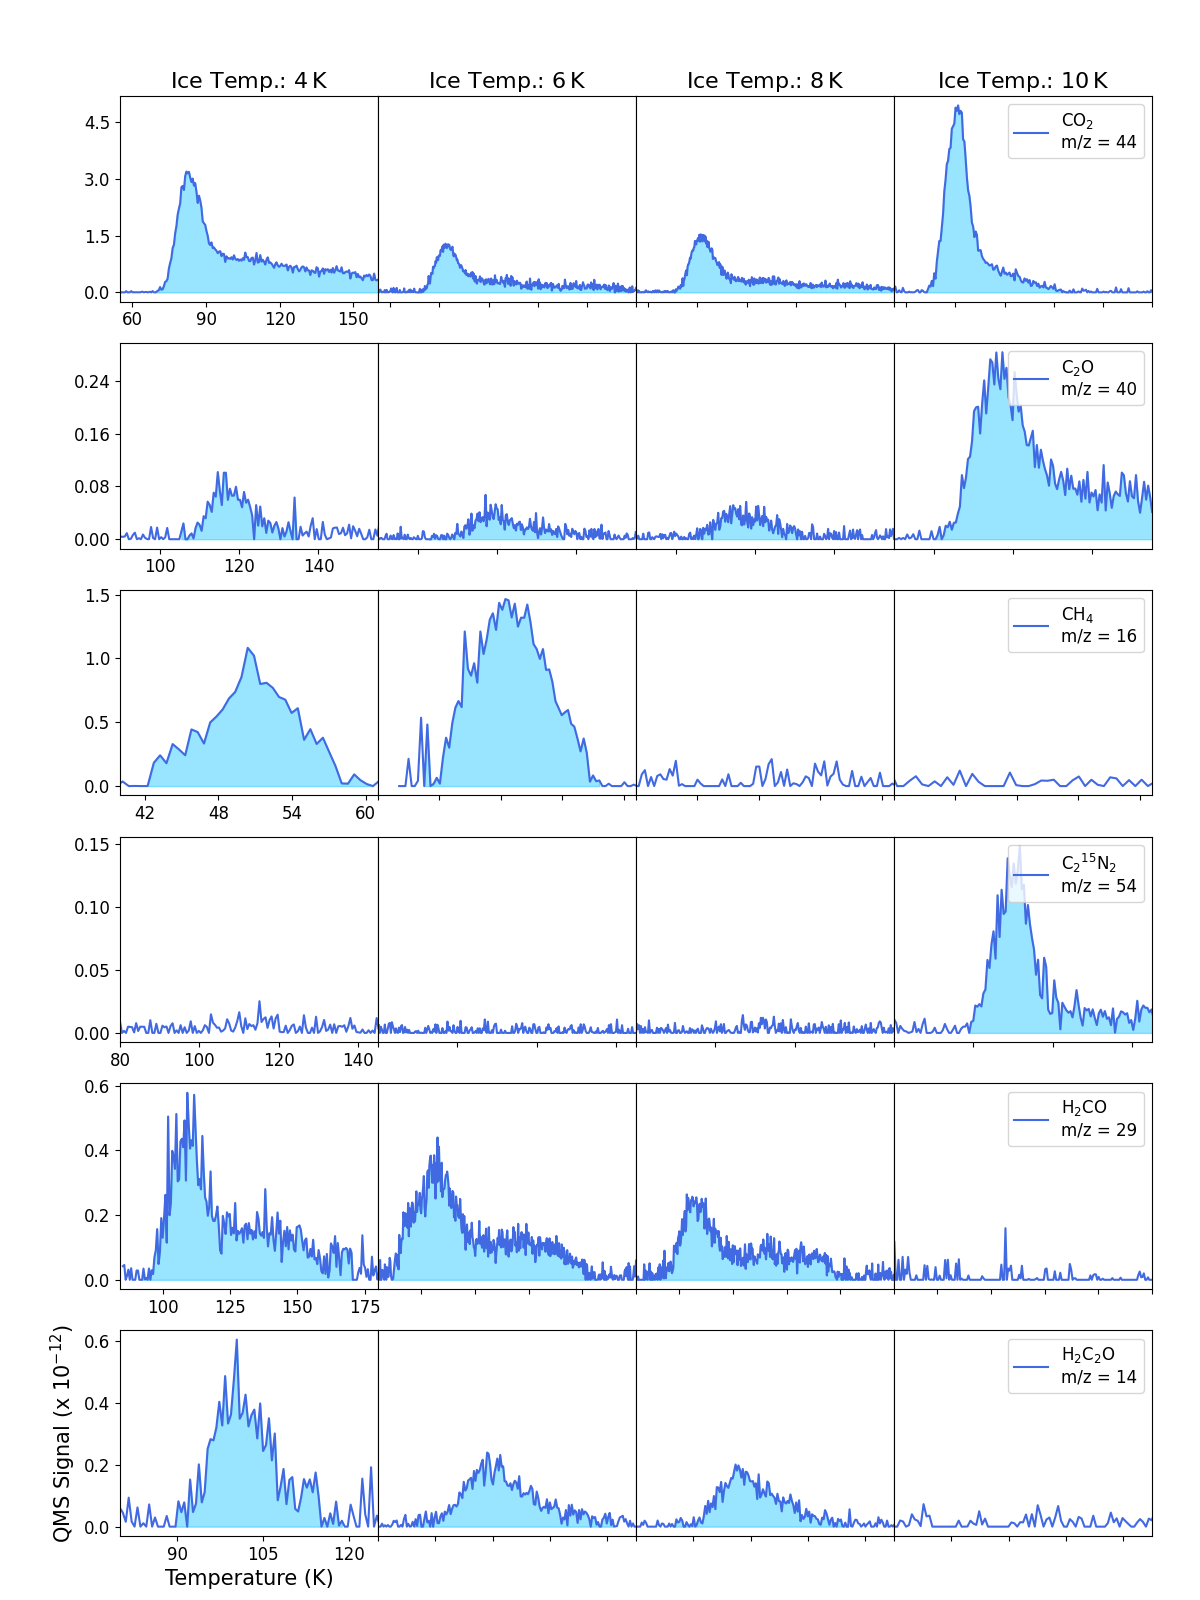

In [168]:
plt.close()
fig,axes = plt.subplots(6,4,figsize=(12,16))
fig.subplots_adjust(wspace=0)
# fig.suptitle('Baselined TPD Plots',size=18)
plt.subplots_adjust(top=0.94,bottom=0.04,left=0.1,right=0.96)
axes[0][0].set_title('Ice Temp.: 4$\,$K',size=16)
axes[0][1].set_title('Ice Temp.: 6$\,$K',size=16)
axes[0][2].set_title('Ice Temp.: 8$\,$K',size=16)
axes[0][3].set_title('Ice Temp.: 10$\,$K',size=16)

axlist = np.concatenate(axes)
for ind,ax in enumerate(axlist):
    
    # Load the plot information
    dic = pickle.load(open(f'Pickles/TPD/{fnames[ind]}.pkl','rb'))
    
    # Pull out the baselined curve
    x,y = dic['blined_curve']['data']
    # Set all negative y values to 0
    y = np.where(y>0,y,0)
    # Pull out the integration fit points
    xfit,_ = dic['intfit']['data']

    # Plot the baselined curve
    ax.plot(x,y,color='royalblue',label=labels[int(ind/4)])
    
    if ind % 4 == 0:
        xlim = ax.get_xlim(); ylim = ax.get_ylim()
        ax.xaxis.set_major_locator(plt.MaxNLocator(4))
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax.tick_params(labelsize=12)
    elif ind % 4 == 1:
        _,ymax = ax.get_ylim()
        if ymax > ylim[1]:
            ylim = ax.get_ylim()
            axlist[ind-1].set_ylim(ylim)
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_yticks([])
        ax.set_xticklabels([])
    elif ind % 4 == 2:
        _,ymax = ax.get_ylim()
        if ymax > ylim[1]:
            ylim = ax.get_ylim()
            axlist[ind-1].set_ylim(ylim)
            axlist[ind-2].set_ylim(ylim)
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_yticks([])
        ax.set_xticklabels([])
    elif ind % 4 == 3:
        _,ymax = ax.get_ylim()
        if ymax > ylim[1]:
            ylim = ax.get_ylim()
            axlist[ind-1].set_ylim(ylim)
            axlist[ind-2].set_ylim(ylim)
            axlist[ind-3].set_ylim(ylim)
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.legend(fontsize=12,loc='upper right')
        
        
    # If there was no fit, continue
    if len(xfit) == 0: continue
    # Plot the fill
    ii = np.squeeze(np.where((x > np.min(xfit)) & (x < np.max(xfit))))
    ax.fill_between(x[ii],y[ii],color='deepskyblue',alpha=.4)

    
for ax in axes[0]:
    ax.set_xlim(55,160)
for ax in axes[1]:
    ax.set_xlim(90,155)
for ax in axes[2]:
    ax.set_xlim(40,61)
for ax in axes[3]:
    ax.set_xlim(80,145)
for ax in axes[4]:
    ax.set_xlim(84,180)
for ax in axes[5]:
    ax.set_xlim(80,125)

axes[-1][0].set_xlabel('Temperature (K)',size=15)
axes[-1][0].set_ylabel('QMS Signal (x $10^{-12}$)',size=15)

plt.show()

In [144]:
fnames = ['4K_m44_CO2', '4K_m40_C2O', '4K_m54_C2N2', '4K_m29_H2CO', '4K_m14_H2C', '4K_m16_CH4']

labels = ['CO$_2$\nm/z = 44','C$_2$O\nm/z = 40','C$_2$$^{15}$N$_2$\nm/z = 54','H$_2$CO\nm/z = 29','H$_2$C$_2$O\nm/z = 14','CH$_4$\nm/z = 16']
tpdylims = [3.4,0.24,0.15,0.6,0.65,1.5]

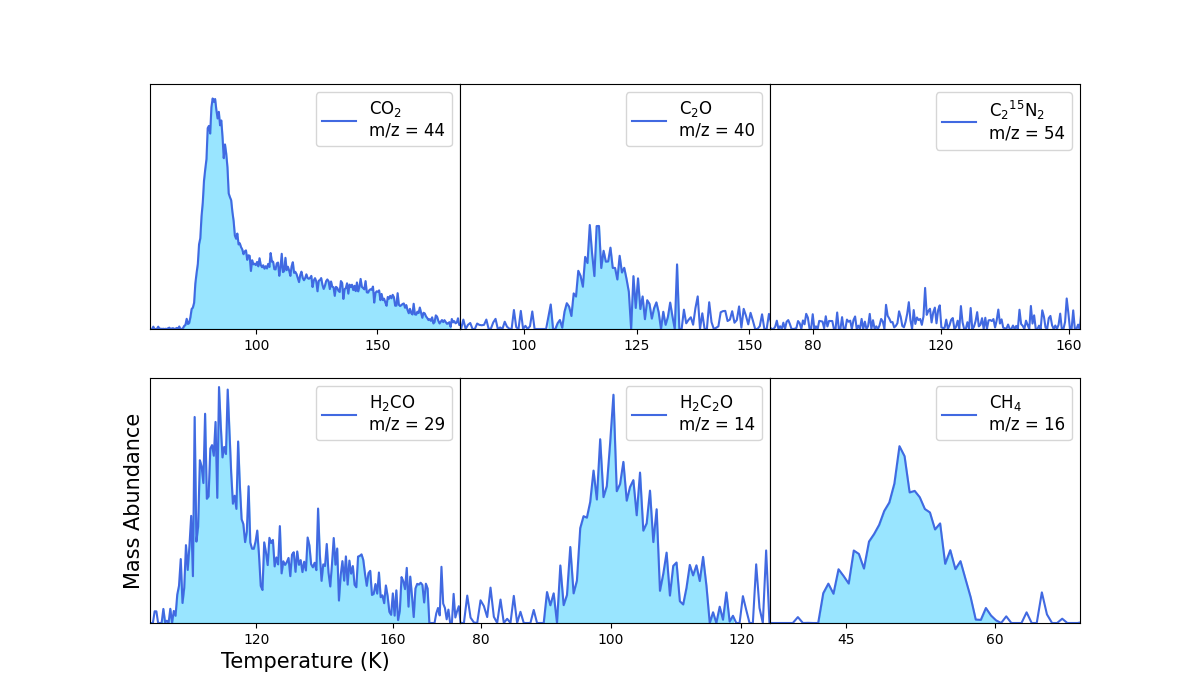

In [145]:
plt.close()
fig,axes = plt.subplots(2,3,figsize=(12,7))
fig.subplots_adjust(wspace=0)
# plt.subplots_adjust(top=0.94,bottom=0.04,left=0.1,right=0.96)

axlist = np.concatenate(axes)
for ind,ax in enumerate(axlist):
    
    # Load the plot information
    dic = pickle.load(open(f'Pickles/TPD/{fnames[ind]}.pkl','rb'))
    
    # Pull out the baselined curve
    x,y = dic['blined_curve']['data']
    # Set all negative y values to 0
    y = np.where(y>0,y,0)
    # Pull out the integration fit points
    xfit,_ = dic['intfit']['data']

    # Plot the baselined curve
    ax.plot(x,y,color='royalblue',label=labels[ind])
    if len(xfit) != 0:
        ii = np.squeeze(np.where((x > np.min(xfit)) & (x < np.max(xfit))))
        ax.fill_between(x[ii],y[ii],color='deepskyblue',alpha=.4)
    
    ax.set_ylim(0,tpdylims[ind])
    xmin,xmax = ax.get_xlim()
    xdist = (xmax-xmin) * 0.08
    ax.set_xlim(xmin+xdist,xmax-xdist)
    ax.legend(fontsize=12,loc='upper right')
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    # ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    
    ax.set_yticks([])

axes[-1][0].set_xlabel('Temperature (K)',size=15)
axes[-1][0].set_ylabel('Mass Abundance',size=15)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


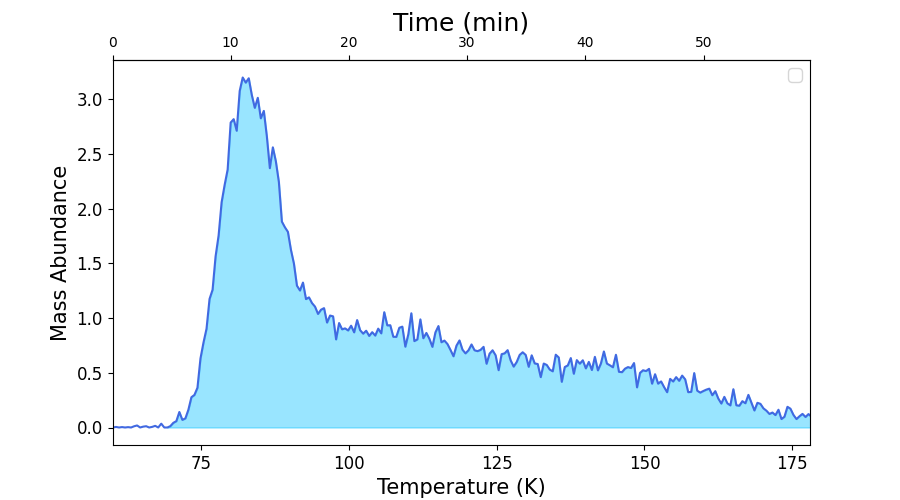

In [312]:
plt.close()
fig,ax = plt.subplots(figsize=(9,5))
# fig.subplots_adjust(wspace=0)
# plt.subplots_adjust(top=0.94,bottom=0.04,left=0.1,right=0.96)

# axlist = np.concatenate(axes)
# for ind,ax in enumerate(axlist):
    
# Load the plot information
dic = pickle.load(open(f'Pickles/TPD/4K_m44_CO2.pkl','rb'))
    
# Pull out the baselined curve
x,y = dic['blined_curve']['data']
# Set all negative y values to 0
y = np.where(y>0,y,0)
# Pull out the integration fit points
xfit,_ = dic['intfit']['data']

# Plot the baselined curve
ax.plot(x,y,color='royalblue')
if len(xfit) != 0:
    ii = np.squeeze(np.where((x > np.min(xfit)) & (x < np.max(xfit))))
    ax.fill_between(x[ii],y[ii],color='deepskyblue',alpha=.4)
    
# ax.set_ylim(0,tpdylims[ind])
xmin,xmax = ax.get_xlim()
xdist = (xmax-xmin) * 0.08
ax.set_xlim(60,178)
ax.legend(fontsize=12,loc='upper right')

ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# ax.set_yticks([])
ax.tick_params(labelsize=12)

def t2time(temp):
    return ((temp-60)/2)
    
def time2t(time):
    return (time*2)+60
    
secax = ax.secondary_xaxis('top', functions=(t2time, time2t))
secax.set_xlabel('Time (min)',size=18)

ax.set_xlabel('Temperature (K)',size=15)
ax.set_ylabel('Mass Abundance',size=15)

plt.show()

In [25]:
fnames = ['4K_m2_H2',     '6K_m2_H2',       '8K_m2_H2',        '10K_m2_H2',
          '4K_m28_CO',    '6K_m28_CO',      '8K_m28_CO',       '10K_m28_CO',
          '4K_m30_N2',    '6K_m30_N2',      '8K_m30_N2',       '10K_m30_N2']
labels = ['H2','CO','N2']

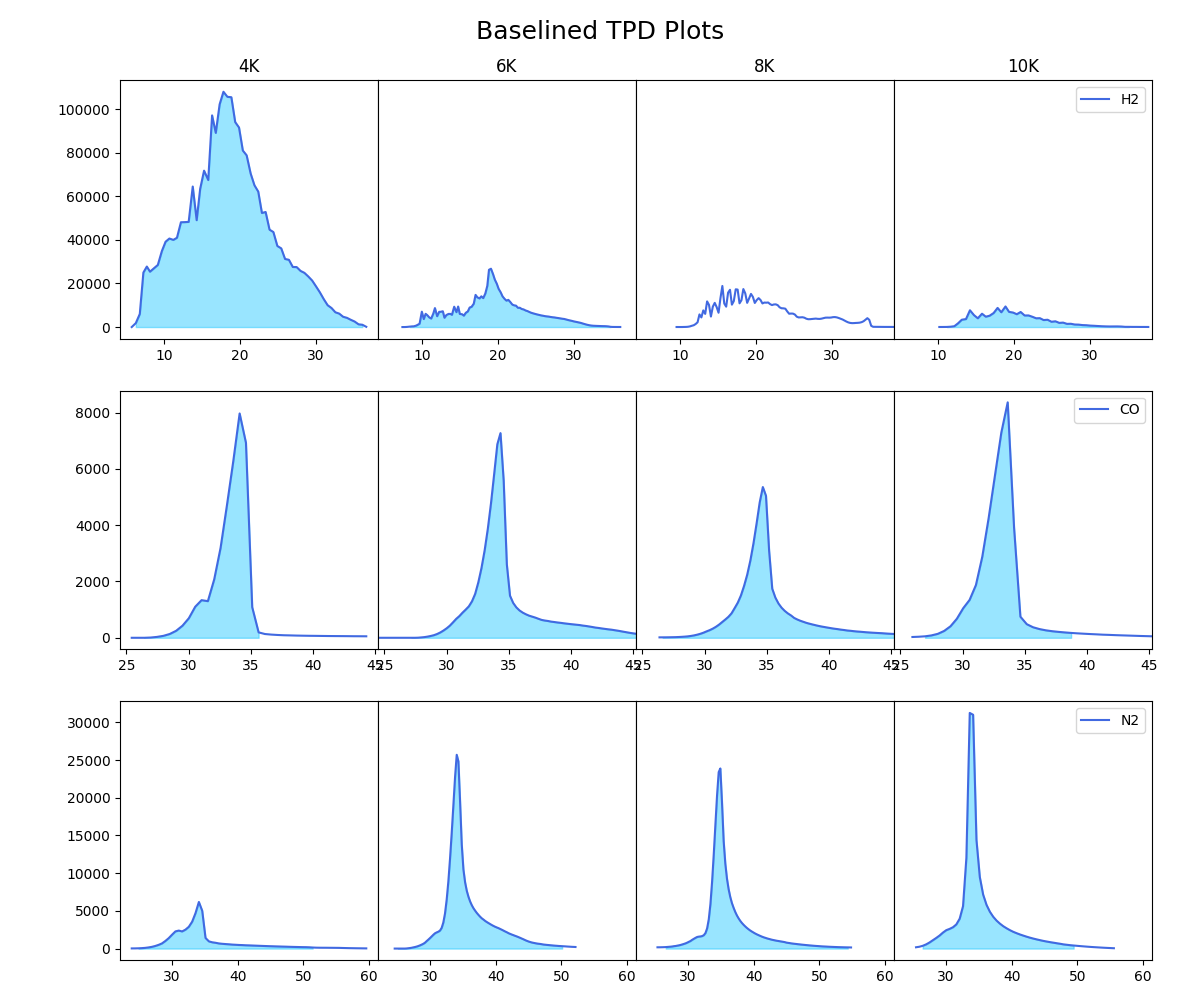

In [30]:
plt.close()
fig,axes = plt.subplots(3,4,figsize=(12,10))
fig.subplots_adjust(wspace=0)
fig.suptitle('Baselined TPD Plots',size=18)
plt.subplots_adjust(top=0.92,bottom=0.04,left=0.1,right=0.96)
axes[0][0].set_title('4K')
axes[0][1].set_title('6K')
axes[0][2].set_title('8K')
axes[0][3].set_title('10K')

axlist = np.concatenate(axes)
for ind,ax in enumerate(axlist):
    
    # Load the plot information
    dic = pickle.load(open(f'Pickles/TPD/{fnames[ind]}.pkl','rb'))
    
    # Pull out the baselined curve
    x,y = dic['blined_curve']['data']
    # Set all negative y values to 0
    y = np.where(y>0,y,0)
    # Pull out the integration fit points
    xfit,_ = dic['intfit']['data']

    # Plot the baselined curve
    ax.plot(x,y,color='royalblue',label=labels[int(ind/4)])
    
    if ind % 4 == 0:
        xlim = ax.get_xlim(); ylim = ax.get_ylim()
    elif ind % 4 == 1:
        _,ymax = ax.get_ylim()
        if ymax > ylim[1]:
            ylim = ax.get_ylim()
            axlist[ind-1].set_ylim(ylim)
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_yticks([])
    elif ind % 4 == 2:
        _,ymax = ax.get_ylim()
        if ymax > ylim[1]:
            ylim = ax.get_ylim()
            axlist[ind-1].set_ylim(ylim)
            axlist[ind-2].set_ylim(ylim)
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_yticks([])
    elif ind % 4 == 3:
        _,ymax = ax.get_ylim()
        if ymax > ylim[1]:
            ylim = ax.get_ylim()
            axlist[ind-1].set_ylim(ylim)
            axlist[ind-2].set_ylim(ylim)
            axlist[ind-3].set_ylim(ylim)
        ax.set_xlim(xlim); ax.set_ylim(ylim)
        ax.set_yticks([])
        ax.legend()
        
        
    # If there was no fit, continue
    if len(xfit) == 0: continue
    # Plot the fill
    ii = np.squeeze(np.where((x > np.min(xfit)) & (x < np.max(xfit))))
    ax.fill_between(x[ii],y[ii],color='deepskyblue',alpha=.4)
    
plt.show()

In [488]:
tpd_qms['time'][0]

0.0

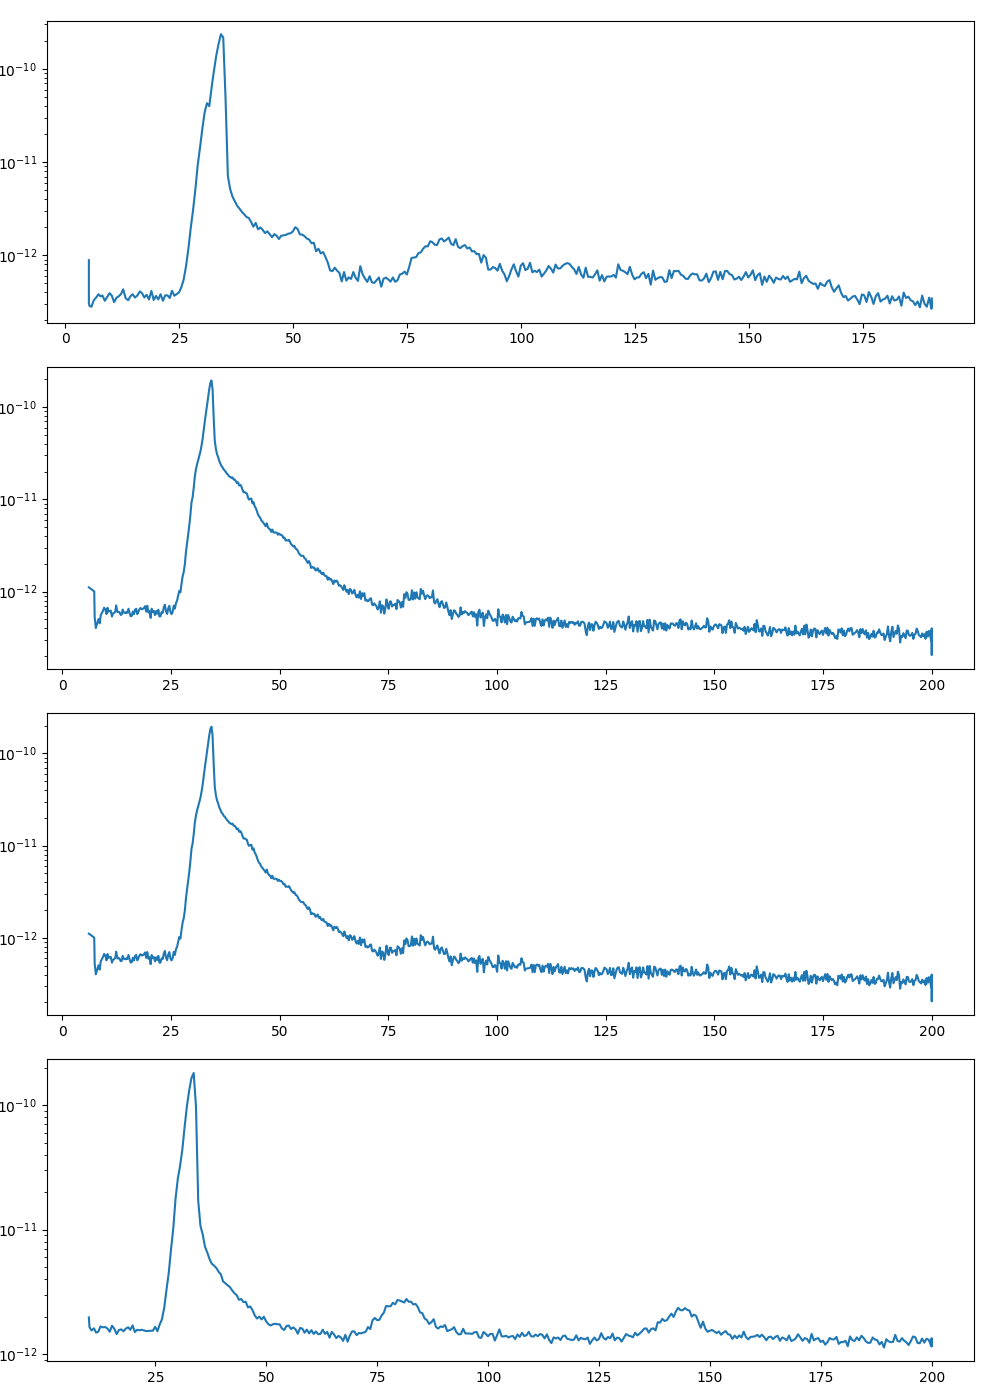

In [489]:
plt.close()
fig,axes = plt.subplots(4,1,figsize=(10,14))
fig.tight_layout()
for ax in axes: ax.set_yscale('log')
axes[0].plot(temp4K2,tpd4K2)
axes[1].plot(temp6K2,tpd6K2)
axes[3].plot(temp10K2,tpd10K2)
axes[2].plot(temp,tpddat[str(mass)])

In [369]:
m = tpd_qms['28'].max()
list(tpd_qms['28']).index(m)

# 3161 --> 34
# 3777 --> 190
# d616 --> d156 

3161

In [253]:
#####
# 8K --> 3158

SyntaxError: invalid syntax (<ipython-input-253-e178cb25a00a>, line 2)

In [248]:
s = 616/156

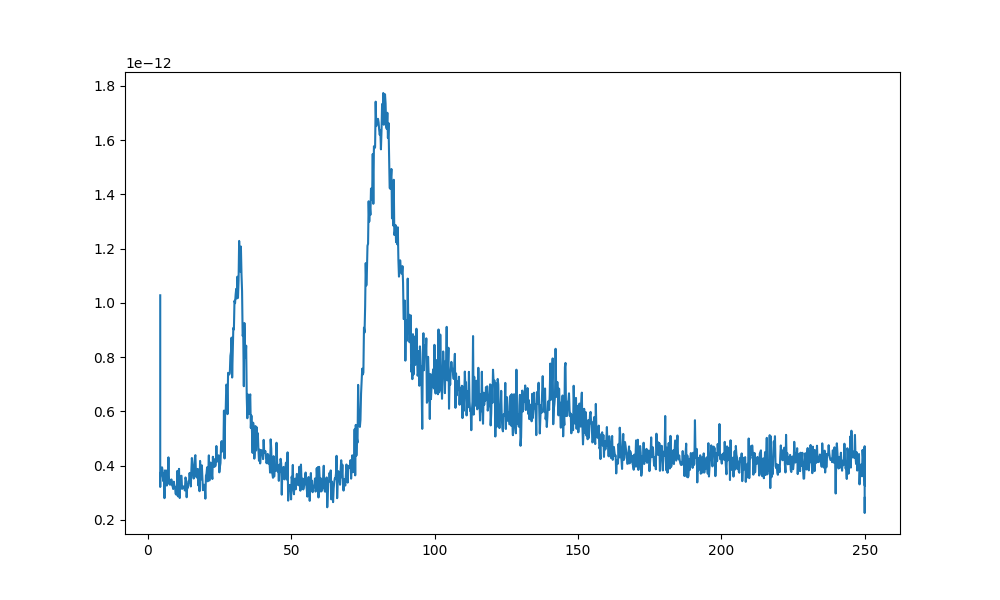

In [103]:
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(temp_int,tpd_qms['44'])

In [ ]:
xin,yin = pickle.load(open('test.pkl','rb'))['points']['data']

stuff I would need to recreate my plots:

points i plotted

fit data

fill data

colors

axis limits

linear or log scale



pick a peak
graphically tells you where the peak is
derivative of the range
add and remove peaks

button to smooth the curves
(with different numbers of points)

integration and gaussian fitting

variable list and when?

sounds?
cat,tiger,mouse,kitten :)

do i need anything other than the baselining code?

In [11]:
from scipy.signal import find_peaks,medfilt

def flatten(spec):
    normspec = spec/np.nanmax(spec)
    spec_medavg = medfilt(normspec,kernel_size=51)
    spec_peaks = np.abs(normspec - spec_medavg)
    return spec_peaks
def find_spec_peaks(spec,height=0.002,distance=6):
    peaks,_ = find_peaks(spec,height=height,distance=distance)
    return peaks

## Spectra

In [4]:
datadir = 'Data'

In [277]:
data4K = sp.load(datadir,'20220519') # Read In Data
data6K = sp.load(datadir,'20220714') # Read In Data
data8K = sp.load(datadir,'20220711') # Read In Data
data10K = sp.load(datadir,'20220610') # Read In Data

In [278]:
spec4K = data4K['Irradiation']['Spectra']
spec6K = data6K['Irradiation']['Spectra']
spec8K = data8K['Irradiation']['Spectra']
spec10K = data10K['Irradiation']['Spectra']

In [279]:
speclist = [spec4K,spec6K,spec8K,spec10K]

In [280]:
keys4K = sorted(spec4K.keys())
keys6K = sorted(spec6K.keys())
keys8K = sorted(spec8K.keys())
keys10K = sorted(spec10K.keys())

In [281]:
keylist = [keys4K,keys6K,keys8K,keys10K]

In [282]:
keylist

[['0', '22', '49'],
 ['0', '15', '30', '45'],
 ['0', '15', '30', '45'],
 ['0', '27', '57']]

In [283]:
icetemp = data10K['Info']['Icetemp']
print('Icetemp: '+str(icetemp))

Icetemp: 10


In [284]:
spc_offsets = [-0.0015,0.0005,0.0355,-0.0035]
temps = [4,6,8,10]

Text(0, 0.5, 'Difference of Absorption')

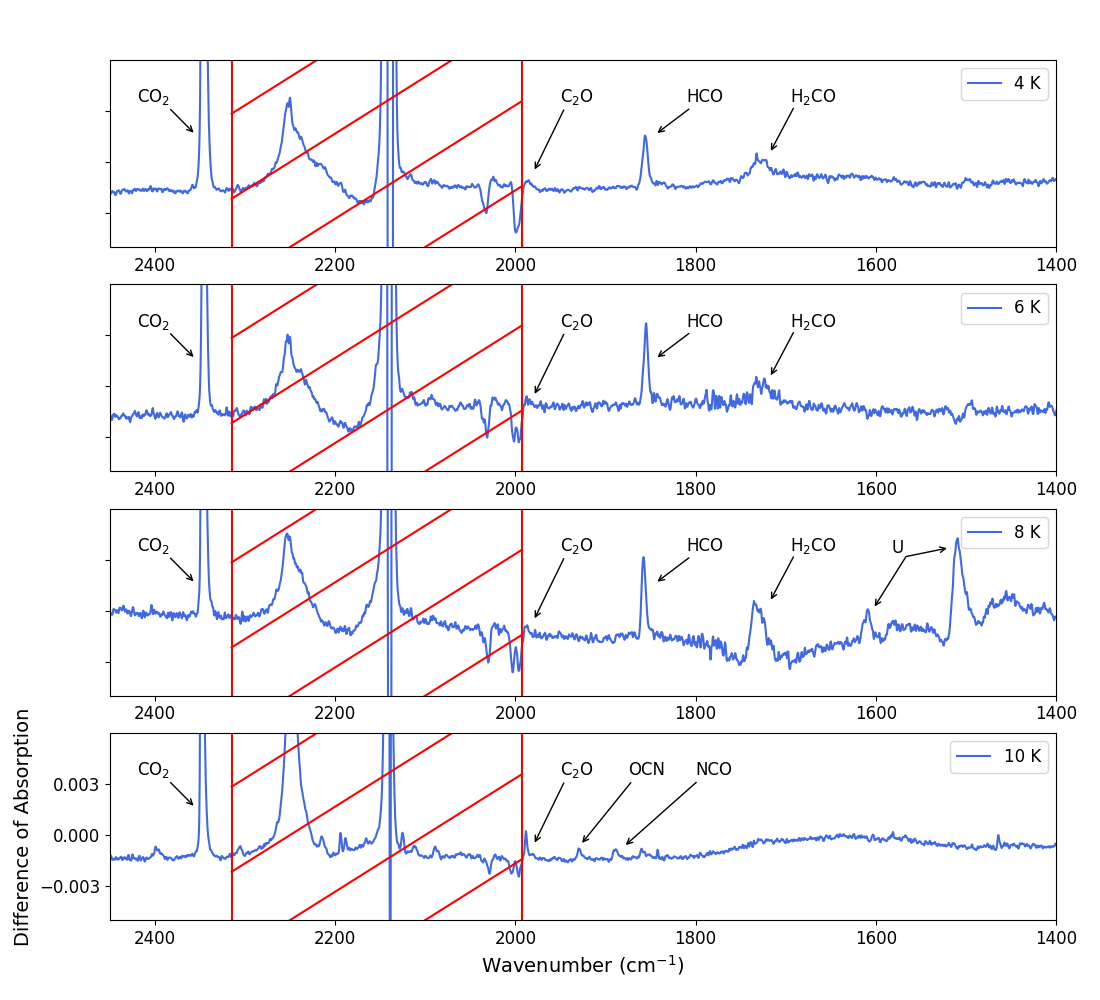

In [287]:
# Setup the figure
plt.close()
imp.reload(aw)
fig,axes = plt.subplots(4,1,figsize=(11,10))
plt.subplots_adjust(top=0.94,bottom=0.08,left=0.1,right=0.96)
# Set figure attributes
# fig.suptitle('Auto Peak Spectra!',size=24)
for ind,ax in enumerate(axes):

    x = spec4K['0']['Wavenumber']
    spec = speclist[ind]
    y = spec[keylist[ind][-1]]['Absorption']-spec['0']['Absorption']

    ax.plot(x,y+spc_offsets[ind],label=f'{temps[ind]} K',color='royalblue')

    ax.set_xlim(2450,1400)
    ymin,ymax = -0.005,0.00599
    ax.set_ylim(ymin,ymax)
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.tick_params(labelsize=12)
    
    if ind in [0,1,2]:
        ax.annotate('H$_2$CO', xy = (1695,0.0035),size=12)
        ax.annotate("", xy=(1718, 0.0005), xytext=(1690, 0.0033), arrowprops=dict(arrowstyle="->"))
        # ax.annotate("", xy=(1509, 0), xytext=(1605, 0.00305), arrowprops=dict(arrowstyle="->"))

        ax.annotate('HCO', xy = (1810,0.0035),size=12)
        ax.annotate("", xy=(1845, 0.0016), xytext=(1805, 0.0032), arrowprops=dict(arrowstyle="->"))
    
    if ind in [0,1,2,3]:
        ax.annotate('C$_2$O', xy = (1950,0.0035),size=12)
        ax.annotate("", xy=(1980, -0.0006), xytext=(1945, 0.0032), arrowprops=dict(arrowstyle="->"))
        ax.annotate('CO$_2$', xy = (2420,0.0035),size=12)
        ax.annotate("", xy=(2355, 0.0016), xytext=(2385, 0.0032), arrowprops=dict(arrowstyle="->"))
        
    if ind in [3]:
        ax.annotate('OCN', xy = (1875,0.0035),size=12)
        ax.annotate("", xy=(1928, -0.0006), xytext=(1870, 0.0032), arrowprops=dict(arrowstyle="->"))
        ax.annotate('NCO', xy = (1800,0.0035),size=12)
        ax.annotate("", xy=(1880, -0.0007), xytext=(1797, 0.0032), arrowprops=dict(arrowstyle="->"))
    
    if ind in [2]:
        ax.annotate('U', xy = (1583,0.0034),size=12)
        ax.annotate("", xy=(1603, 0.0001), xytext=(1565, 0.0033), arrowprops=dict(arrowstyle="->"))
        ax.annotate("", xy=(1518, 0.0037), xytext=(1569, 0.00315), arrowprops=dict(arrowstyle="->"))
        
    if ind != len(axes)-1:
        ax.set_yticklabels([])
    
    badcolor='r'
    ax.vlines(1993,ymin,ymax,color=badcolor)
    ax.vlines(2315,ymin,ymax,color=badcolor)
    redx = np.linspace(1993,2315)
    ax.plot(redx,redx/-30000+0.080,color=badcolor)
    ax.plot(redx,redx/-30000+0.075,color=badcolor)
    ax.plot(redx,redx/-30000+0.070,color=badcolor)
    ax.plot(redx,redx/-30000+0.065,color=badcolor)
    ax.legend(fontsize=12,loc='upper right')

axes[-1].set_xlabel('Wavenumber (cm$^{-1}$)',size=14)
axes[-1].set_ylabel('Difference of Absorption',size=14)


In [18]:
def get_keys(specdic):
    keys = sorted([int(key[:-1]) for key in specdic['Irradiation']['Spectra'].keys() if 'K' in key])
    keys = [f'{key}K' for key in keys]
    return keys
def linfunc(x0,y0,x1,y1,xarr):
    m = (y1-y0)/(x1-x0)
    b = y0 - m*x0
    xarr = np.array(xarr)
    return m * xarr + b

In [19]:
imp.reload(sp)

exp1 = sp.load('Data','20220718')
exp2 = sp.load('Data','20220802b')
exp3 = sp.load('Data','20220708b')
exp4 = sp.load('Data','20220729')
exp5 = sp.load('Data','20220802a')
exp6 = sp.load('Data','20220801')
exp7 = sp.load('Data','20220803')

In [20]:
keys1 = get_keys(exp1)
keys2 = get_keys(exp2)
keys3 = get_keys(exp3)
keys4 = get_keys(exp4)
keys5 = get_keys(exp5)[:-1]
keys6 = get_keys(exp6)
keys7 = get_keys(exp7)

In [21]:
explist = [exp1,exp2,exp3,exp4,exp5,exp6]
keylist = [keys1,keys2,keys3,keys4,keys5,keys6,]

In [22]:
from matplotlib.patches import Rectangle

In [23]:
labels = ['Experiment 1 $-$ CO:H$_2$',             'Experiment 2 $-$ CO:H$_2$',
          'Experiment 3 $-$ CO:$^{15}$N$_2$:H$_2$','Experiment 4 $-$ CO:$^{15}$N$_2$:H$_2$',
          'Experiment 5 $-$ CO:$^{15}$N$_2$:H$_2$','Experiment 6 $-$ CO:$^{15}$N$_2$:H$_2$']

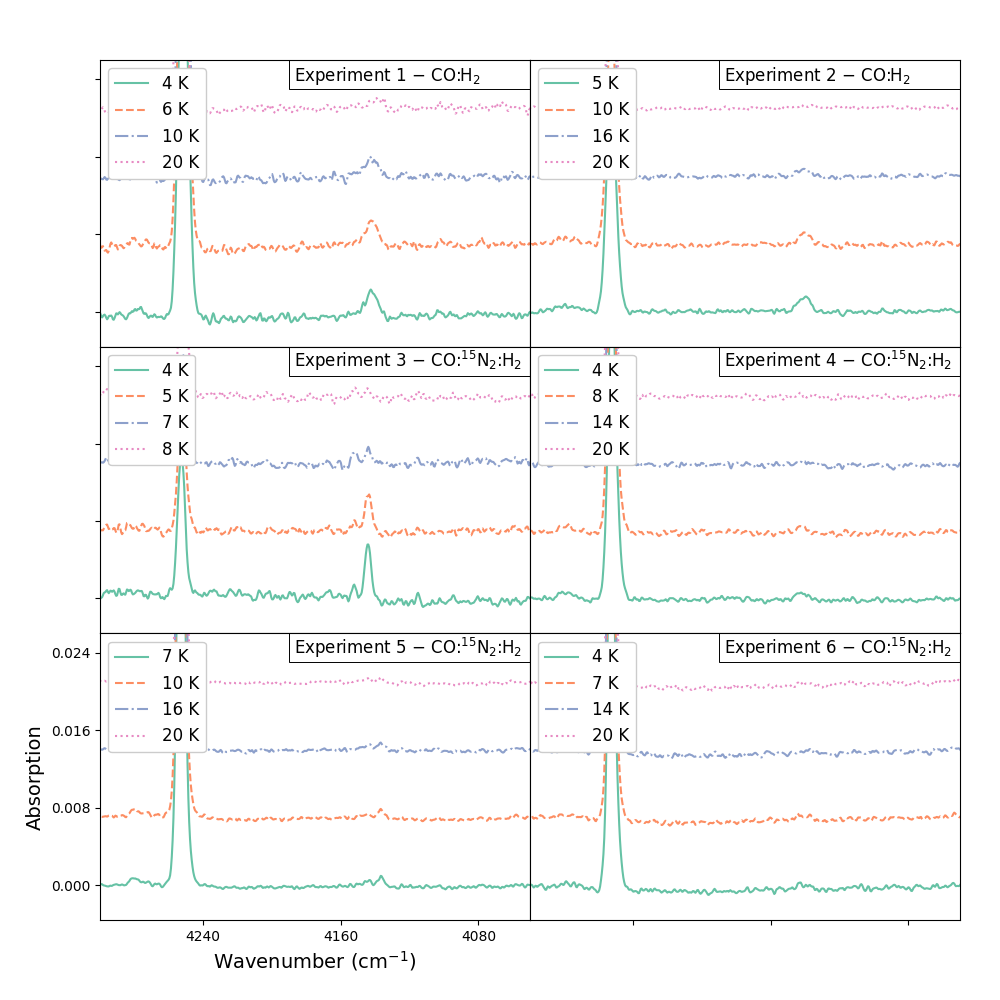

In [152]:
plt.close()
fig,axes = plt.subplots(3,2,figsize=(10,10))
axes = axes.flatten()
fig.subplots_adjust(wspace=0,hspace=0)
plt.subplots_adjust(top=0.94,bottom=0.08,left=0.1,right=0.96)

colors = sns.color_palette('Set2').as_hex()
lstyle = ['solid','dashed','dashdot','dotted']


offset = 0.007

for ind,ax in enumerate(axes):
    xmin,xmax = 4300,4050
    ax.set_xlim(xmin,xmax)
    ymin,ymax = -0.0036,0.026
    ax.set_ylim(ymin,ymax)
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    bbox = Rectangle((4190,ymax),210,0.003,angle=180,edgecolor='k',facecolor='white',snap=True,linewidth=0.7)
    ax.add_patch(bbox)
    ax.annotate(labels[ind], xy = (4187,0.02385),size=12)

    if ind % 2 == 1:
        ax.set_yticks([])
    if ind == 4:
        ax.set_xlabel('Wavenumber (cm$^{-1}$)',size=14)
        ax.set_ylabel('Absorption',size=14)
        continue
    ax.set_yticklabels([])
    ax.set_xticklabels([])


for kind,keys in enumerate(keylist):
    oset = 0
    mid = int(len(keys)/2)
    thrd1,thrd2 = int(len(keys)/3),int(2*len(keys)/3)
    keys = np.array(keys)[[0,thrd1,thrd2,-1]]#[[0,mid,-1]]
    for ind,key in enumerate(keys):
        spec = explist[kind]['Irradiation']['Spectra'][key]
        x,y = spec['Wavenumber'],spec['Absorption']
        ledge = np.squeeze(np.where(x>xmin))[-1]
        redge = np.squeeze(np.where(x<xmax))[0]
        line = linfunc(x[ledge],y[ledge],x[redge],y[redge],x)
        axes[kind].plot(x,y-line+oset,label=f'{key[:-1]} K',color=colors[ind],linestyle=lstyle[ind])
        oset += offset
    axes[kind].legend(loc='upper left',framealpha=1,fontsize=12)
    

In [85]:
inferno = ['#fcffa4','#fbb61a','#ed6925','#bc3754','#781c6d','#320a5e','#000004']

Text(4123, 0.0086, '')

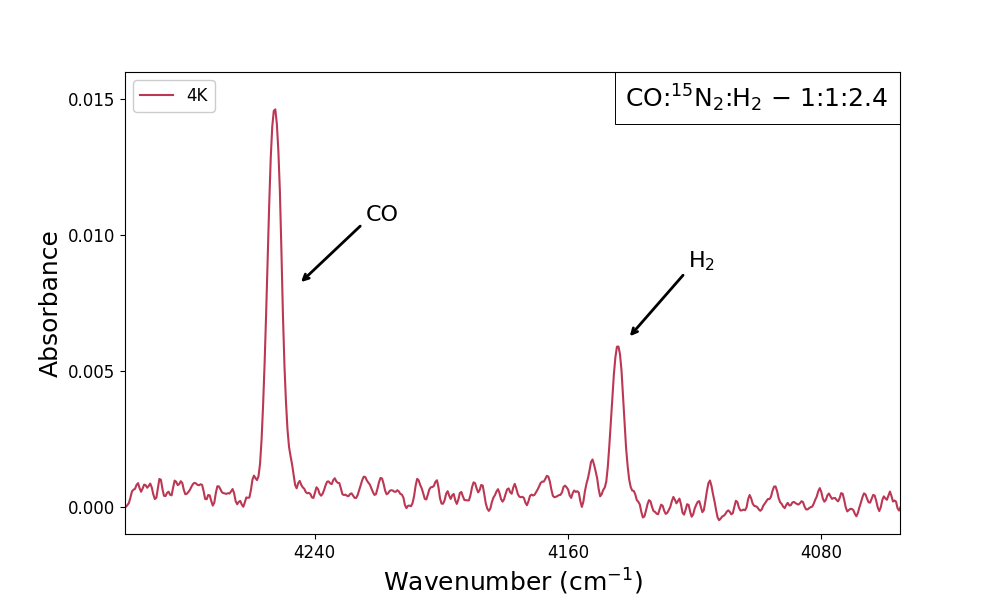

In [327]:
plt.close()
fig,ax = plt.subplots(figsize=(10,6))
# fig.subplots_adjust(wspace=0,hspace=0)
# plt.subplots_adjust(top=0.94,bottom=0.08,left=0.1,right=0.96)

colors = sns.color_palette('Set2').as_hex()
lstyle = ['solid','dashed','dashdot','dotted']


offset = 0.007


xmin,xmax = 4300,4055
ax.set_xlim(xmin,xmax)
ymin,ymax = -0.001,0.016
ax.set_ylim(ymin,ymax)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
bbox = Rectangle((4145,ymax),210,0.0019,angle=180,edgecolor='k',facecolor='white',snap=True,linewidth=0.7)
ax.add_patch(bbox)
ax.annotate('CO:$^{15}$N$_2$:H$_2$ $-$ 1:1:2.4', xy = (4142,0.0147),size=18)

ax.tick_params(labelsize=12)

spec = exp3['Irradiation']['Spectra']['4K']
x,y = spec['Wavenumber'],spec['Absorption']
ledge = np.squeeze(np.where(x>xmin))[-1]
redge = np.squeeze(np.where(x<xmax))[0]
line = linfunc(x[ledge],y[ledge],x[redge],y[redge],x)
ax.plot(x,y-line,label='4K',color=inferno[1])
ax.set_xlabel('Wavenumber (cm$^{-1}$)',size=18)
ax.set_ylabel('Absorbance',size=18)
ax.legend(loc='upper left',framealpha=1,fontsize=12)

ax.annotate('CO', xy = (4224,0.0105),size=16)
ax.annotate("", xy=(4245, 0.0082), xytext=(4225, 0.0104), arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('H$_2$', xy = (4122,0.0088),size=16)
ax.annotate("", xy=(4141, 0.0062), xytext=(4123, 0.0086), arrowprops=dict(arrowstyle="->",linewidth=2))

Text(0.5, 0, 'Wavelength ($\\mu$m)')

<ipython-input-274-d7c78e589791>:39: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(wvl/(10**4))


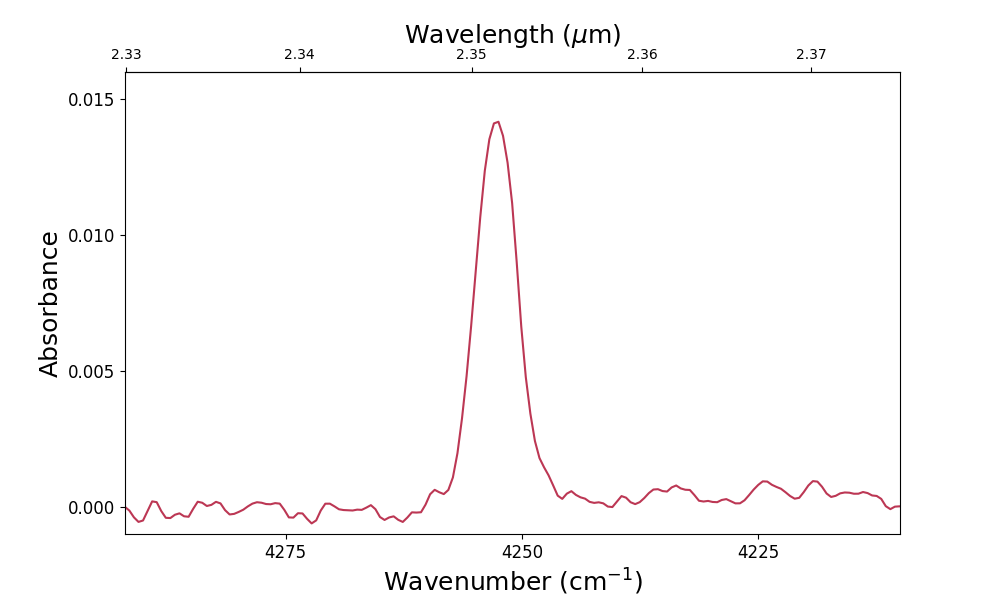

In [274]:
plt.close()
fig,ax = plt.subplots(figsize=(10,6))
# fig.subplots_adjust(wspace=0,hspace=0)
# plt.subplots_adjust(top=0.94,bottom=0.08,left=0.1,right=0.96)

colors = sns.color_palette('Set2').as_hex()
lstyle = ['solid','dashed','dashdot','dotted']


offset = 0.007


xmin,xmax = 4292,4210
ax.set_xlim(xmin,xmax)
ymin,ymax = -0.001,0.016
ax.set_ylim(ymin,ymax)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
bbox = Rectangle((4145,ymax),210,0.0019,angle=180,edgecolor='k',facecolor='white',snap=True,linewidth=0.7)
ax.add_patch(bbox)
ax.annotate('CO:$^{15}$N$_2$:H$_2$ $-$ 1:1:2.4', xy = (4142,0.0147),size=18)

ax.tick_params(labelsize=12)

spec = exp3['Irradiation']['Spectra']['4K']
x,y = spec['Wavenumber'],spec['Absorption']
ledge = np.squeeze(np.where(x>xmin))[-1]
redge = np.squeeze(np.where(x<xmax))[0]
line = linfunc(x[ledge],y[ledge],x[redge],y[redge],x)
ax.plot(x,y-line,label='4K',color=inferno[1])
ax.set_xlabel('Wavenumber (cm$^{-1}$)',size=18)
ax.set_ylabel('Absorbance',size=18)
# ax.legend(loc='upper left',framealpha=1,fontsize=12)

def wvn2wvl(wvn):
    return (1/wvn)*(10**4)
    
def wvl2wvn(wvl):
    return 1/(wvl/(10**4))
    
secax = ax.secondary_xaxis('top', functions=(wvn2wvl, wvl2wvn))
secax.set_xlabel('Wavelength ($\\mu$m)',size=18)
# secax.set_major_locator(plt.MaxNLocator(4))

# ax.annotate('CO$_2$', xy = (4224,0.0105),size=16)
# ax.annotate("", xy=(4245, 0.0082), xytext=(4225, 0.0104), arrowprops=dict(arrowstyle="->",linewidth=2))

# ax.annotate('H$_2$', xy = (4122,0.0088),size=16)
# ax.annotate("", xy=(4141, 0.0062), xytext=(4123, 0.0086), arrowprops=dict(arrowstyle="->",linewidth=2))

In [184]:
inferno = ['#ed6925','#bc3754','#320a5e','#000004']

In [238]:
exp3['Irradiation']['Spectra']['10K'] = exp4['Irradiation']['Spectra']['10K']

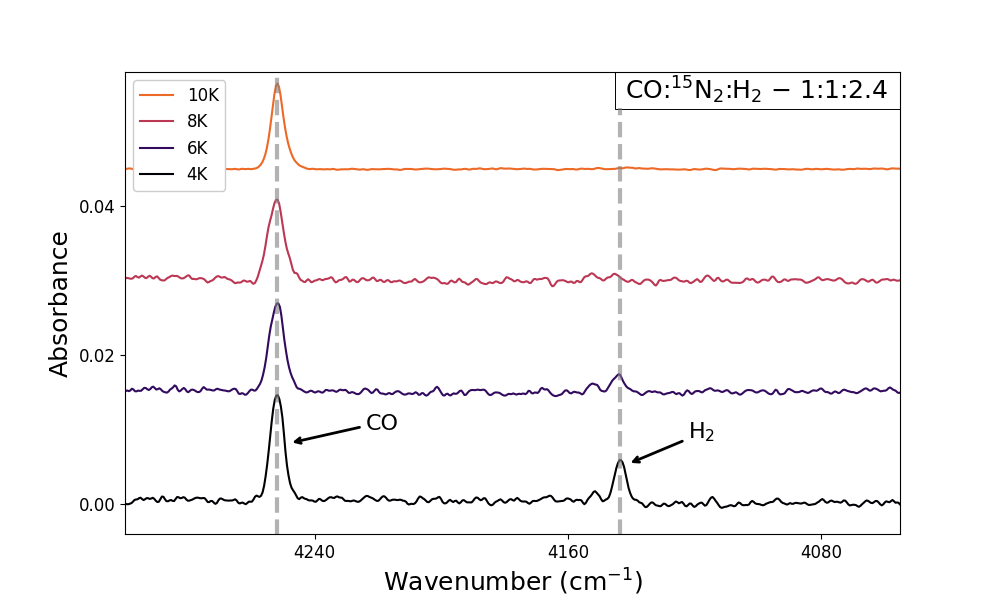

In [326]:
plt.close()
fig,ax = plt.subplots(figsize=(10,6))
# fig.subplots_adjust(wspace=0,hspace=0)
# plt.subplots_adjust(top=0.94,bottom=0.08,left=0.1,right=0.96)

colors = sns.color_palette('Set2').as_hex()
lstyle = ['solid','dashed','dashdot','dotted']


offset = 0.015
xoffsets = [-0.7,0.7,0,-0.8]

xmin,xmax = 4300,4055
ax.set_xlim(xmin,xmax)
ymin,ymax = -0.004,0.058
ax.set_ylim(ymin,ymax)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
bbox = Rectangle((4145,ymax),210,0.0049,angle=180,edgecolor='k',facecolor='white',snap=True,linewidth=0.7)
ax.add_patch(bbox)
ax.annotate('CO:$^{15}$N$_2$:H$_2$ $-$ 1:1:2.4', xy = (4142,0.05435),size=18)

ax.tick_params(labelsize=12)

temps = ['4K','6K','8K','10K']
temps.reverse()
scale = [0.3,1,1,1]
num = 3
for i in range(num+1):
    spec = exp3['Irradiation']['Spectra'][temps[i]]
    x,y = spec['Wavenumber'],spec['Absorption']
    y = y*scale[i]
    ledge = np.squeeze(np.where(x>xmin))[-1]
    redge = np.squeeze(np.where(x<xmax))[0]
    line = linfunc(x[ledge],y[ledge],x[redge],y[redge],x)
    ax.plot(x+xoffsets[i],y-line+(num-i)*offset,label=temps[i],color=inferno[i])
ax.set_xlabel('Wavenumber (cm$^{-1}$)',size=18)
ax.set_ylabel('Absorbance',size=18)
ax.legend(loc='upper left',framealpha=1,fontsize=12)
    
ax.annotate('CO', xy = (4224,0.010),size=16)
ax.annotate("", xy=(4248, 0.0082), xytext=(4225, 0.0104), arrowprops=dict(arrowstyle="->",linewidth=2))

ax.annotate('H$_2$', xy = (4122,0.0088),size=16)
ax.annotate("", xy=(4141, 0.0054), xytext=(4123, 0.0086), arrowprops=dict(arrowstyle="->",linewidth=2))

ax.vlines(4252,-0.01,0.07,linewidth=3,linestyle='--',color='grey',alpha=0.6)
ax.vlines(4143.5,-0.01,0.05319,linewidth=3,linestyle='--',color='grey',alpha=0.6)

## OTHER STUFF

In [ ]:
'Exp1_co_15n2_h2_TPD_QMS.asc'
'Exp1_co_15n2_h2_TPD_temperature.xls'

In [90]:
import pandas as pd

In [91]:
tpd_qms = sp.tpd_readqms('Data/paper/Exp1_co_15n2_h2_TPD_QMS.asc')
tpd_temp = pd.read_excel('Data/paper/Exp1_co_15n2_h2_TPD_temperature.xls', index_col=None, header=3)

In [289]:
tpd_temp = pd.read_excel('Data/20220711/TPD/20220711_h2_co_15n2_TPD.xls', index_col=None, header=3)
tpd_qms = sp.tpd_readqms('Data/20220711/TPD/20220711 102133 N2 H2 CO - tpd.asc')

In [223]:
from scipy.interpolate import interp1d

In [314]:
tpd_interp = interp1d(round(tpd_temp.loc[:,'Time']*1.e-3), tpd_temp.loc[:,'Input B'], kind='cubic',fill_value='extrapolate')  #Interpolate time+temperature data
temp_int = tpd_interp(tpd_qms.iloc[3158:,:]['time'] - tpd_qms.iloc[3055,:]['time'])   # Assign interplated temperature values to the tpd data
# fdata['TPD_qms']['Temp'] = temp_int # Add the interpolated temperature values to the qms dataframe

In [315]:
temp_int[-1]

190.00400893715081

In [196]:
temp_int

array([  7.9539    ,   7.93173338,   7.97757257, ..., 190.0595165 ,
       190.10806488, 190.15718241])

In [161]:
tpd_qms['time']

0           0.000
1           7.929
2          15.588
3          23.240
4          30.878
          ...    
3773    28825.216
3774    28832.874
3775    28840.497
3776    28848.163
3777    28855.787
Name: time, Length: 3778, dtype: float64

In [150]:
tpd_temp = pd.read_excel('Data/20220714/TPD/20220714_h2_co_15n2_TPD.xls', index_col=None, header=3)
tpd_qms = sp.tpd_readqms('Data/20220714/TPD/20220714 152738 N2 H2 CO - TPD.asc')

tpd_interp = interp1d(round(tpd_temp.loc[:,'Time']*1.e-3), tpd_temp.loc[:,'Input B'], kind='cubic',fill_value='extrapolate')  #Interpolate time+temperature data
temp_int = tpd_interp(tpd_qms['time'])   # Assign interplated temperature values to the tpd data
# fdata['TPD_qms']['Temp'] = temp_int # Add the interpolated temperature values to the qms dataframe

In [151]:
temp_int

0          0.000
1         40.964
2         48.883
3         56.492
4         64.094
          ...   
1294    9894.808
1295    9902.415
1296    9910.019
1297    9917.624
1298    9925.251
Name: time, Length: 1299, dtype: float64

In [149]:
tpd_temp.loc[:,'Time']*1.e-3

0            0.000
1            1.000
2            1.999
3            2.998
4            3.998
           ...    
10625    10624.992
10626    10625.992
10627    10626.992
10628    10627.992
10629    10628.991
Name: Time, Length: 10630, dtype: float64

In [288]:
tpd_qms.iloc[3158:,:]['time']

3158    24123.931
3159    24131.590
3160    24139.260
3161    24146.926
3162    24154.593
          ...    
3773    28825.216
3774    28832.874
3775    28840.497
3776    28848.163
3777    28855.787
Name: time, Length: 620, dtype: float64

In [ ]:
elif '.xls' in file: tpd_temp = pd.read_excel(file, index_col=None, header=3)
        elif '.asc' in file:
            # Read the mass data into a dataframe
            tpd_qms = tpd_readqms(file)
            fdata['TPD_qms'] = tpd_qms
    if 'TPD' in folder_path:
        
    return fdata,gen_data

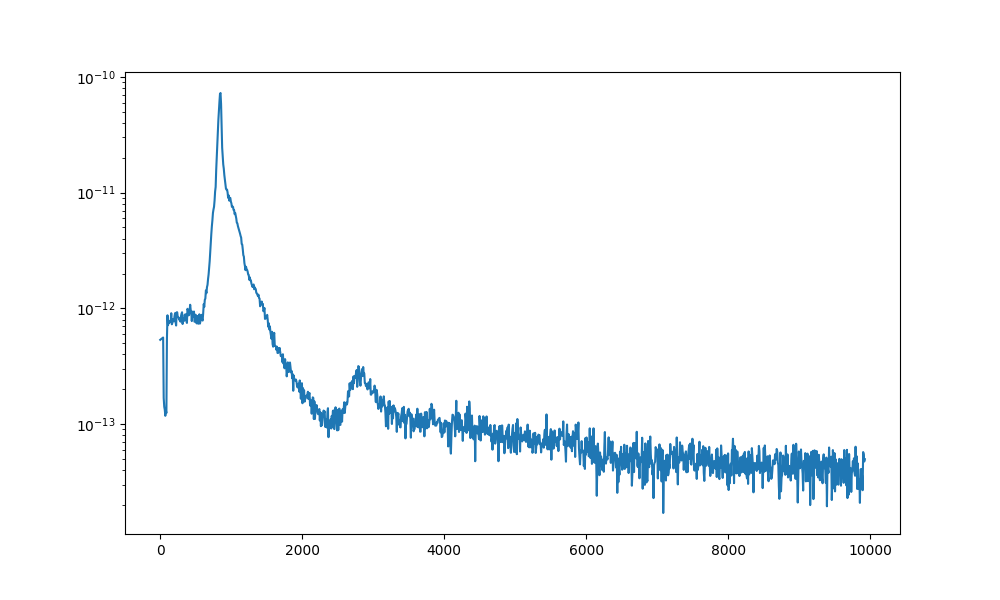

In [156]:
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(tpd_qms['time'],tpd_qms['14'])
ax.set_yscale('log')